# Trees and Forests

We will study some tree-based models using a different dataset, the wisconsin breast cancer dataset describe below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

## Tree visualization
Let's start by building a very small tree (``max_depth=2``) and visualizing it.
The model fitting shouldn't be anything new:

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Scikit-learn has a way to export trees to ``dot`` graphs using the ``export_graphviz`` function: 

In [7]:
from sklearn.tree import export_graphviz
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
print(tree_dot)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="worst perimeter <= 106.1\ngini = 0.4679\nsamples = 426\nvalue = [159, 267]", fillcolor="#399de567"] ;
1 [label="worst concave points <= 0.1339\ngini = 0.0813\nsamples = 259\nvalue = [11, 248]", fillcolor="#399de5f4"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0083\nsamples = 240\nvalue = [1, 239]", fillcolor="#399de5fe"] ;
1 -> 2 ;
3 [label="gini = 0.4986\nsamples = 19\nvalue = [10, 9]", fillcolor="#e5813919"] ;
1 -> 3 ;
4 [label="worst concave points <= 0.1416\ngini = 0.2017\nsamples = 167\nvalue = [148, 19]", fillcolor="#e58139de"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.4967\nsamples = 37\nvalue = [20, 17]", fillcolor="#e5813926"] ;
4 -> 5 ;
6 [label="gini = 0.0303\nsamples = 130\nvalue = [128, 2]", fillcolor="#e58139fb"] ;
4 -> 6 ;
}


If you have graphviz installed, you can plot this using the following code. However, that's often a bit cumbersome, and I give an alternativ below.

In [8]:
import graphviz
graphviz.Source(tree_dot)

ModuleNotFoundError: No module named 'graphviz'

I included a small function ``plot_tree`` in this lesson that can plot the tree without graphviz. It will hopefully be included in scikit-learn soon.

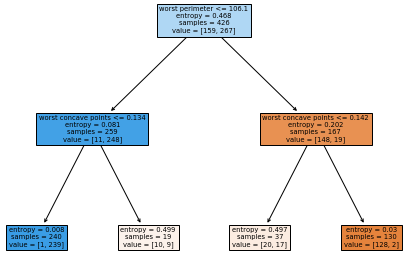

In [9]:
# import from local file, not in sklearn yet
from tree_plotting import plot_tree

plot_tree(tree, feature_names=cancer.feature_names, filled=True)

### Task 1

Create a plot of the full tree, that is without limiting depth.
Then, create visualizations of trees with varying ``max_depth`` and ``max_leaf_nodes``. How are these trees different? Which do you think will generalize best?

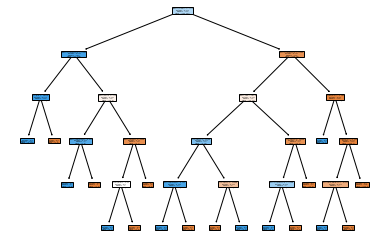

In [15]:
fulltree = DecisionTreeClassifier()
fulltree.fit(X_train, y_train)
#fulltree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
plot_tree(fulltree, feature_names=cancer.feature_names, filled=True)

[1 2 3 4 5]


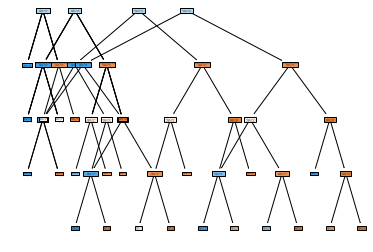

In [32]:
print(np.arange(1,6))

for i in np.arange(1,5):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    plot_tree(tree, feature_names=cancer.feature_names, filled=True)

for i in np.arange(1,5):
    tree = DecisionTreeClassifier(max_leaf_nodes=i+1)
    tree.fit(X_train, y_train)
    plot_tree(tree, feature_names=cancer.feature_names, filled=True)


# Parameter Tuning
### Task 2
Tune the ``max_leaf_nodes`` parameter using ``GridSearchCV``:

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth":[1,2,3,4,5],"max_leaf_nodes":[2,3,4,5,6,7,8]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,cv=10, return_train_score=True)
grid.fit(X_train, y_train)
# inspect best parameters, compute test-set accuracy
#....
print(grid.best_params_)
grid.cv_results_

{'max_depth': 2, 'max_leaf_nodes': 6}


{'mean_fit_time': array([ 0.004,  0.004,  0.005,  0.005,  0.004,  0.005,  0.005,  0.004,
         0.006,  0.007,  0.008,  0.005,  0.007,  0.007,  0.005,  0.004,
         0.005,  0.006,  0.007,  0.006,  0.007,  0.005,  0.005,  0.006,
         0.007,  0.006,  0.006,  0.007,  0.005,  0.006,  0.007,  0.006,
         0.007,  0.008,  0.007]),
 'mean_score_time': array([  3.014e-04,   6.041e-04,   4.076e-04,   0.000e+00,   3.999e-04,
          1.003e-04,   4.003e-04,   3.998e-04,   1.043e-04,   1.039e-04,
          0.000e+00,   1.207e-03,   4.061e-04,   4.136e-04,   0.000e+00,
          1.206e-03,   1.222e-03,   0.000e+00,   0.000e+00,   7.967e-04,
          1.309e-04,   5.003e-04,   3.988e-04,   1.042e-04,   9.854e-05,
          6.500e-04,   4.148e-04,   5.027e-04,   3.046e-04,   1.008e-04,
          1.003e-04,   4.002e-04,   4.227e-04,   7.061e-04,   1.003e-04]),
 'mean_test_score': array([ 0.88 ,  0.899,  0.906,  0.906,  0.906,  0.906,  0.906,  0.88 ,
         0.899,  0.904,  0.918,  0.923

We can plot the tree that was fitted with the best parameters on the full training data by accessing ``grid.best_estimator_``:

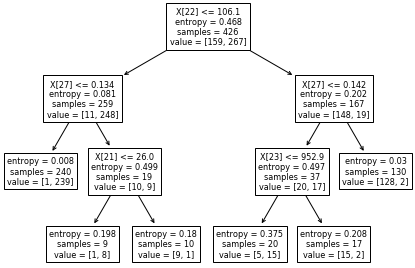

In [44]:
plot_tree(grid.best_estimator_)

It's easy to visualize the mean training set and  validation accuracy as we did in the last lab:

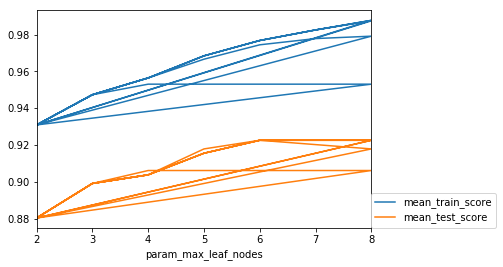

In [45]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

### Task 3
Plot the feature importances of the ``best_estimator_`` using a bar chart.

In [ ]:
# solution here ...

# Random Forests
While we could in theory visualize all the trees in a forest, they are random by design, and usually there are too many to look at.
So we'll skip the visualization, and go directly to parameter tuning

### Task 4
Tune the ``max_depth`` parameter of the ``RandomForestClassifier``. Make sure to set ``n_estimators`` to a large enough number (such as 100).

Plot the feature importances of the best random forest side-by-side with the feature importances of the best decision tree.

Finally, compare the precision recall curve of the best random forest with the best tree.